<h2> Practica </h2>

In [2]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

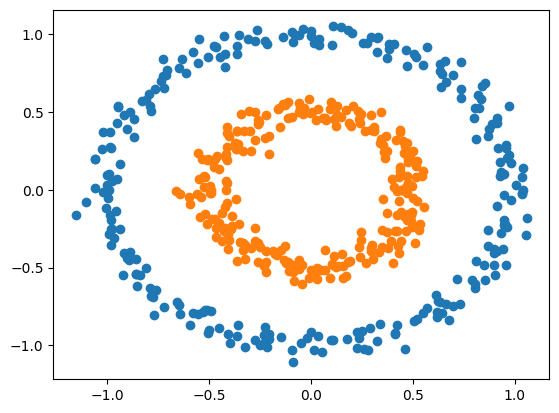

In [24]:
#Crear dataset

n = 500 # numero de datos
p = 2 # numero de caracteristicas

X, Y = make_circles(n, factor=0.5, noise=0.05)

Y = Y[:, np.newaxis]

plt.scatter(X[ Y[:, 0] == 0, 0], X[ Y[:, 0] == 0, 1])
plt.scatter(X[ Y[:, 0] == 1, 0], X[ Y[:, 0] == 1, 1])

plt.show()

In [25]:
class neural_layer():

    def __init__(self, n_conn, n_neur, act_f):

        self.act_f = act_f
        
        self.b = np.random.rand(1, n_neur) * 2 - 1 # parametro de vallas, tantas como neuronas tenga la capa
        self.W = np.random.rand(n_conn, n_neur) * 2 - 1 # numero de conexiones

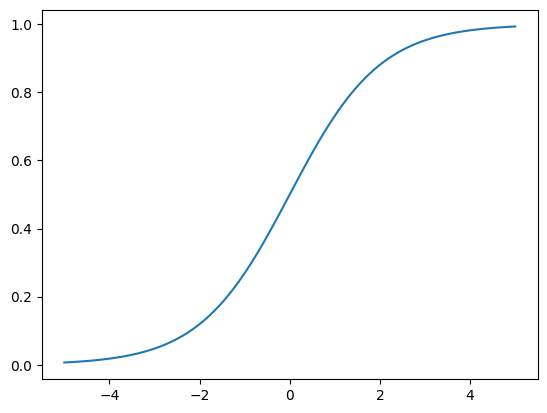

In [26]:
# Funciones de activacion

sigm = (lambda x: 1 / (1 + np.e**(-x)),
        lambda x: x * (1 - x ))

relu = lambda x: np.maximum(0, x)

_x = np.linspace(-5, 5, 100)
plt.plot(_x, sigm[0](_x))

In [27]:
l0 = neural_layer(p, 4, sigm)
l1 = neural_layer(4, 8, sigm)

def create_nn(topology, act_f):

    nn = []

    for l, layer in enumerate(topology[:-1]):

        nn.append(neural_layer(topology[l], topology[l+1], act_f))

    return nn 

In [32]:
topology = [p, 4, 8, 16, 8, 4, 1] # Elegido de forma arbitraria, hay formas de elegirlas

neural_net = create_nn(topology, sigm)

l2_cost = (lambda Yp, Yr: np.mean((Yp - Yr)**2), # Error medio cuadrático
           lambda Yp, Yr: (Yp - Yr))

def train(neural_net, X, Y, l2_cost, lr = 0.5, train=True): # Lo mejor sería crear dos funciones diferentes

    # Forward pass
    out = [(None, X)]

    for l, layer in enumerate(neural_net):
        
        z = out[-1][1] @ neural_net[l].W + neural_net[l].b
        a = neural_net[l].act_f[0](z)

        out.append((z, a))

    if train:
        # Backward pass
        deltas = []

        for l in reversed(range(0, len(neural_net))):
            
            z = out[l + 1][0]
            a = out[l + 1][1]

            if l == len(neural_net) - 1:
                # Calculamos delta ultima capa
                deltas.insert(0, l2_cost[1](a, Y) * neural_net[l].act_f[1](a))
            else:
                deltas.insert(0, deltas[0] @ _W.T * neural_net[l].act_f[1](a))

            _W = neural_net[l].W

            # Gradient descent
            neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis=0, keepdims=True) * lr
            neural_net[l].W = neural_net[l].W - out[l][1].T @ deltas[0] * lr

    return out[-1][1]

train(neural_net, X, Y, l2_cost)

array([[0.57269527],
       [0.57298185],
       [0.57376152],
       [0.5730106 ],
       [0.57352533],
       [0.57385886],
       [0.57354529],
       [0.57371872],
       [0.57349444],
       [0.57276917],
       [0.5736999 ],
       [0.57330483],
       [0.57390582],
       [0.57275737],
       [0.5730315 ],
       [0.57305922],
       [0.57345268],
       [0.57333139],
       [0.57385089],
       [0.57338459],
       [0.57345385],
       [0.57377315],
       [0.57278833],
       [0.57277249],
       [0.57318548],
       [0.57353417],
       [0.57377791],
       [0.57299854],
       [0.57351125],
       [0.57311934],
       [0.57276788],
       [0.57377332],
       [0.57339261],
       [0.57323239],
       [0.57323519],
       [0.5738021 ],
       [0.57322   ],
       [0.5735688 ],
       [0.57296556],
       [0.57334952],
       [0.5736738 ],
       [0.57356835],
       [0.57369677],
       [0.57326028],
       [0.57345988],
       [0.57296424],
       [0.57290689],
       [0.573